In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
plotly.__version__

'3.7.0'

In [2]:
#Importing the aggregated data
data=pd.read_csv('Indicator_Aggregated_21-03-2018.csv')
data.head()

,Year,Country Name,Health Workforce,Healthcare Activities,Adolescent Fertitlity rate(births per 1000 women ages 15-19),"Fertility rate, total (births per woman)",Survival to age 65 Female,Survival to age 65 Male,Survival to age 65 (% of cohort),Infant Mortality,Avg Mortality Rate,"Mortality rate, adult, female","Mortality rate, adult, male",Overall Population,Female Population,Male Population,Population Growth Rate,Age dependency Ratio,Sex Ratio(Male to Female)
0,1960,European Union,NaN,NaN,-0.240377,-0.175933,0.118371,0.040324,0.079347,NaN,-0.275233,-0.285502,-0.264963,0.040191,0.839253,0.622655,-0.542898,-0.162078,0.821584
1,1961,European Union,NaN,NaN,-0.213048,-0.168673,0.156453,0.065586,0.111020,NaN,-0.303875,-0.321378,-0.286372,0.039921,0.854174,0.639082,-0.508897,-0.137044,0.824330
2,1962,European Union,NaN,NaN,-0.187328,-0.171574,0.194690,0.090843,0.142766,NaN,-0.286403,-0.314099,-0.258707,0.041219,0.869780,0.655826,-0.634063,-0.121763,0.826359
3,1963,European Union,NaN,NaN,-0.188559,-0.150098,0.214221,0.102519,0.158370,NaN,-0.290609,-0.324141,-0.257077,0.043544,0.885752,0.672347,-0.607015,-0.112616,0.827480
4,1964,European Union,NaN,NaN,-0.191342,-0.130377,0.233770,0.114194,0.173982,NaN,-0.338486,-0.366055,-0.310918,0.045938,0.901654,0.687978,-0.490586,-0.103209,0.827501


In [3]:
# Column names
data.columns

Index(['Year', 'Country Name', 'Health Workforce', 'Healthcare Activities',
       'Adolescent Fertitlity rate(births per 1000 women ages 15-19)',
       'Fertility rate, total (births per woman)', 'Survival to age 65 Female',
       'Survival to age 65 Male', 'Survival to age 65 (% of cohort)',
       'Infant Mortality', 'Avg Mortality Rate',
       'Mortality rate, adult, female', 'Mortality rate, adult, male',
       'Overall Population', 'Female Population', 'Male Population',
       'Population Growth Rate', 'Age dependency Ratio',
       'Sex Ratio(Male to Female)'],
      dtype='object')

In [4]:
#% of null value 
data.isnull().sum().sort_values(ascending=False)*100/len(data)

Healthcare Activities                                           91.517857
Health Workforce                                                87.678571
Infant Mortality                                                40.000000
Mortality rate, adult, male                                      8.750000
Mortality rate, adult, female                                    8.750000
Avg Mortality Rate                                               8.750000
Fertility rate, total (births per woman)                         1.785714
Population Growth Rate                                           1.785714
Adolescent Fertitlity rate(births per 1000 women ages 15-19)     1.785714
Survival to age 65 (% of cohort)                                 1.785714
Survival to age 65 Male                                          1.785714
Survival to age 65 Female                                        1.785714
Country Name                                                     0.000000
Sex Ratio(Male to Female)             

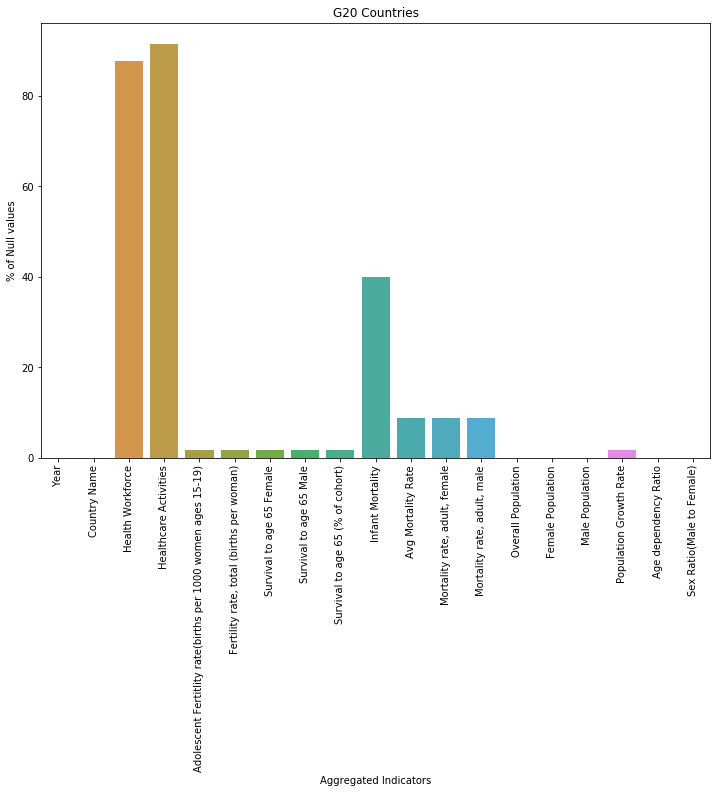

In [5]:
# Null value representation plot
plt.figure(figsize=[12,8])
a=data.isnull().sum()*100/len(data)
sns.barplot(data.columns,a.values)
plt.xlabel('Aggregated Indicators')
plt.ylabel('% of Null values')
plt.title('G20 Countries')
plt.xticks(rotation=90)
plt.show()

# Missing Value Imputation 

# Japan

In [6]:
# Null value imputation for Health Workforce in Japan
data[data['Country Name']=='Japan'].isnull().sum()


Year                                                             0
Country Name                                                     0
Health Workforce                                                18
Healthcare Activities                                           56
Adolescent Fertitlity rate(births per 1000 women ages 15-19)     1
Fertility rate, total (births per woman)                         1
Survival to age 65 Female                                        1
Survival to age 65 Male                                          1
Survival to age 65 (% of cohort)                                 1
Infant Mortality                                                 0
Avg Mortality Rate                                               3
Mortality rate, adult, female                                    3
Mortality rate, adult, male                                      3
Overall Population                                               0
Female Population                                             

### Health Workforce null value treatment

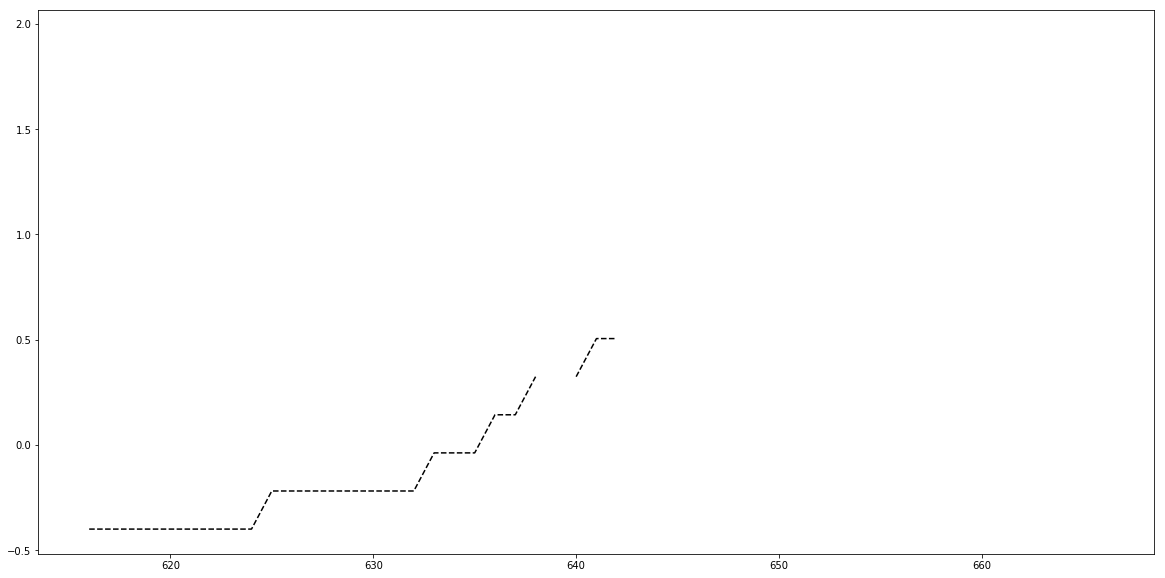

In [7]:
# Graph
data[data['Country Name']=='Japan']['Health Workforce'].plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10))

In [8]:
data[data['Country Name']=='Japan'].isnull().sum()

Year                                                             0
Country Name                                                     0
Health Workforce                                                18
Healthcare Activities                                           56
Adolescent Fertitlity rate(births per 1000 women ages 15-19)     1
Fertility rate, total (births per woman)                         1
Survival to age 65 Female                                        1
Survival to age 65 Male                                          1
Survival to age 65 (% of cohort)                                 1
Infant Mortality                                                 0
Avg Mortality Rate                                               3
Mortality rate, adult, female                                    3
Mortality rate, adult, male                                      3
Overall Population                                               0
Female Population                                             

In [13]:
#Iterate this loop n times till the values get filled
col=['Adolescent Fertitlity rate(births per 1000 women ages 15-19)','Fertility rate, total (births per woman)',
     'Avg Mortality Rate','Mortality rate, adult, female',
     'Mortality rate, adult, male',
     'Health Workforce',
     'Survival to age 65 (% of cohort)','Survival to age 65 Female','Survival to age 65 Male',
     'Population Growth Rate']
for i in col:
    df=data[data['Country Name']=='Japan']
    df_mean=df[i].rolling(2,min_periods=1,).mean()
    df[i].fillna(df_mean,inplace=True)

    data[data['Country Name']=='Japan']=df
    
data[data['Country Name']=='Japan'].isnull().sum()

C:\Users\HII\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Year                                                             0
Country Name                                                     0
Health Workforce                                                 0
Healthcare Activities                                           56
Adolescent Fertitlity rate(births per 1000 women ages 15-19)     0
Fertility rate, total (births per woman)                         0
Survival to age 65 Female                                        0
Survival to age 65 Male                                          0
Survival to age 65 (% of cohort)                                 0
Infant Mortality                                                 0
Avg Mortality Rate                                               0
Mortality rate, adult, female                                    0
Mortality rate, adult, male                                      0
Overall Population                                               0
Female Population                                             

# Turkey

In [14]:
# Null value imputation for Health Workforce in Japan
data[data['Country Name']=='Turkey'].isnull().sum()

Year                                                             0
Country Name                                                     0
Health Workforce                                                 4
Healthcare Activities                                           56
Adolescent Fertitlity rate(births per 1000 women ages 15-19)     1
Fertility rate, total (births per woman)                         1
Survival to age 65 Female                                        1
Survival to age 65 Male                                          1
Survival to age 65 (% of cohort)                                 1
Infant Mortality                                                 0
Avg Mortality Rate                                               1
Mortality rate, adult, female                                    1
Mortality rate, adult, male                                      1
Overall Population                                               0
Female Population                                             

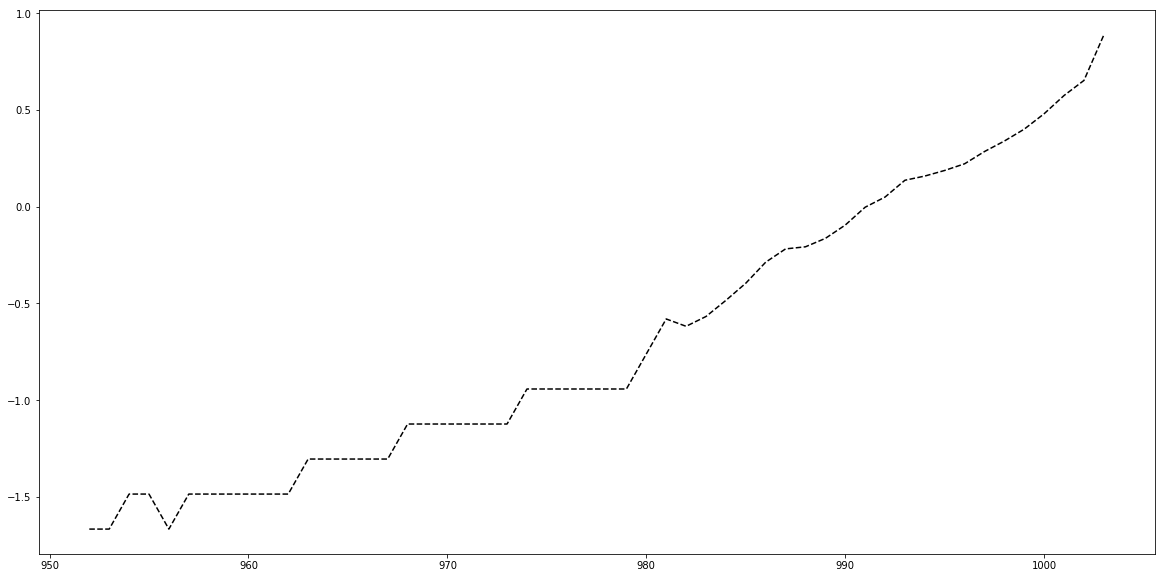

In [15]:
### Health Workforce null value treatment

# Graph
data[data['Country Name']=='Turkey']['Health Workforce'].plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10))



In [19]:
col=['Adolescent Fertitlity rate(births per 1000 women ages 15-19)','Fertility rate, total (births per woman)',
     'Avg Mortality Rate','Mortality rate, adult, female',
     'Mortality rate, adult, male',
     'Health Workforce',
     'Survival to age 65 (% of cohort)','Survival to age 65 Female','Survival to age 65 Male',
     'Population Growth Rate']
for i in col:
    df=data[data['Country Name']=='Turkey']
    df_mean=df[i].rolling(2,min_periods=1,).mean()
    df[i].fillna(df_mean,inplace=True)

    data[data['Country Name']=='Turkey']=df
    
data[data['Country Name']=='Turkey'].isnull().sum()

C:\Users\HII\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Year                                                             0
Country Name                                                     0
Health Workforce                                                 0
Healthcare Activities                                           56
Adolescent Fertitlity rate(births per 1000 women ages 15-19)     0
Fertility rate, total (births per woman)                         0
Survival to age 65 Female                                        0
Survival to age 65 Male                                          0
Survival to age 65 (% of cohort)                                 0
Infant Mortality                                                 0
Avg Mortality Rate                                               0
Mortality rate, adult, female                                    0
Mortality rate, adult, male                                      0
Overall Population                                               0
Female Population                                             

# United Kingdom

In [20]:
data[data['Country Name']=='United Kingdom'].isnull().sum()

Year                                                             0
Country Name                                                     0
Health Workforce                                                 8
Healthcare Activities                                           56
Adolescent Fertitlity rate(births per 1000 women ages 15-19)     1
Fertility rate, total (births per woman)                         1
Survival to age 65 Female                                        1
Survival to age 65 Male                                          1
Survival to age 65 (% of cohort)                                 1
Infant Mortality                                                 0
Avg Mortality Rate                                               2
Mortality rate, adult, female                                    2
Mortality rate, adult, male                                      2
Overall Population                                               0
Female Population                                             

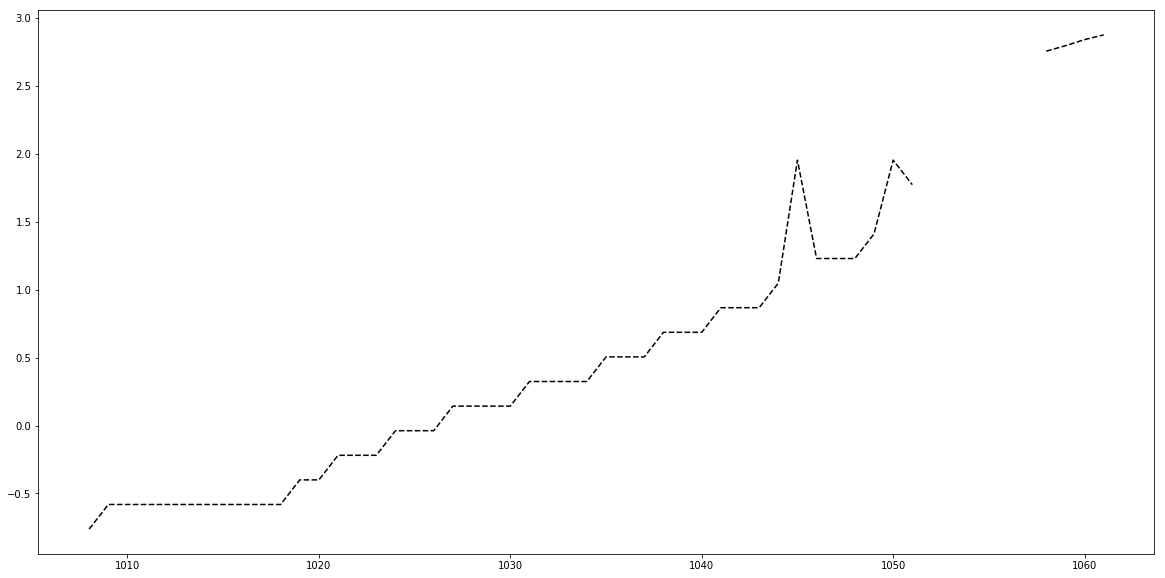

In [21]:
### Health Workforce null value treatment

# Graph
data[data['Country Name']=='United Kingdom']['Health Workforce'].plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10))



In [28]:
col=['Adolescent Fertitlity rate(births per 1000 women ages 15-19)','Fertility rate, total (births per woman)',
     'Avg Mortality Rate','Mortality rate, adult, female',
     'Mortality rate, adult, male',
     'Health Workforce',
     'Survival to age 65 (% of cohort)','Survival to age 65 Female','Survival to age 65 Male',
     'Population Growth Rate']
for i in col:
    df=data[data['Country Name']=='United Kingdom']
    df_mean=df[i].rolling(2,min_periods=1,).mean()
    df[i].fillna(df_mean,inplace=True)

    data[data['Country Name']=='United Kingdom']=df
    
data[data['Country Name']=='United Kingdom'].isnull().sum()


C:\Users\HII\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Year                                                             0
Country Name                                                     0
Health Workforce                                                 0
Healthcare Activities                                           56
Adolescent Fertitlity rate(births per 1000 women ages 15-19)     0
Fertility rate, total (births per woman)                         0
Survival to age 65 Female                                        0
Survival to age 65 Male                                          0
Survival to age 65 (% of cohort)                                 0
Infant Mortality                                                 0
Avg Mortality Rate                                               0
Mortality rate, adult, female                                    0
Mortality rate, adult, male                                      0
Overall Population                                               0
Female Population                                             

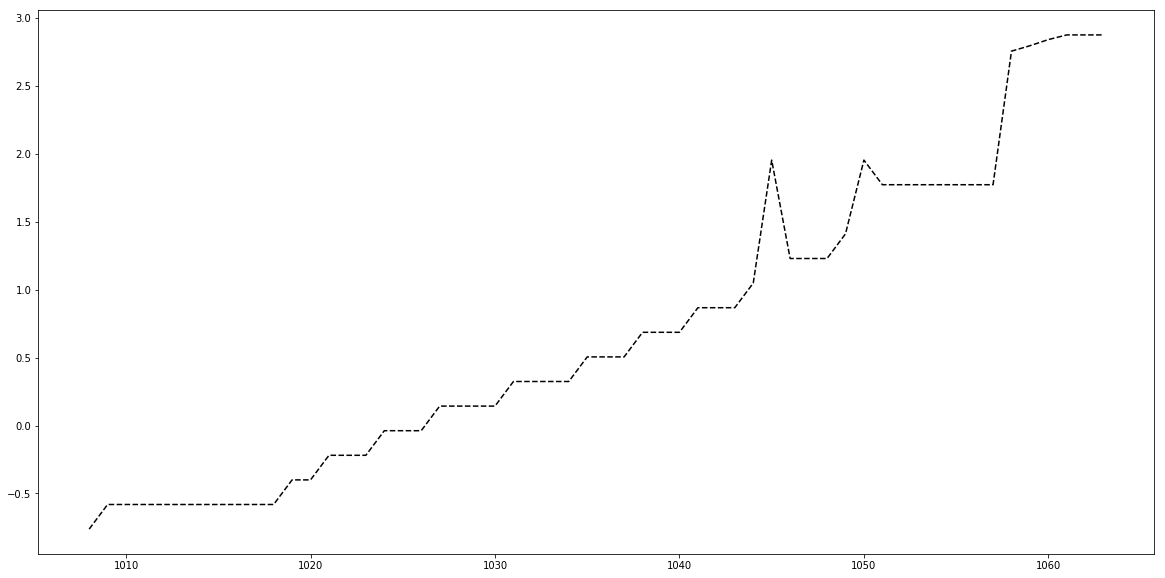

In [29]:

# Graph
data[data['Country Name']=='United Kingdom']['Health Workforce'].plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10))


# Australia


In [30]:
data[data['Country Name']=='Australia'].isnull().sum()

Year                                                             0
Country Name                                                     0
Health Workforce                                                56
Healthcare Activities                                           11
Adolescent Fertitlity rate(births per 1000 women ages 15-19)     1
Fertility rate, total (births per woman)                         1
Survival to age 65 Female                                        1
Survival to age 65 Male                                          1
Survival to age 65 (% of cohort)                                 1
Infant Mortality                                                 0
Avg Mortality Rate                                               4
Mortality rate, adult, female                                    4
Mortality rate, adult, male                                      4
Overall Population                                               0
Female Population                                             

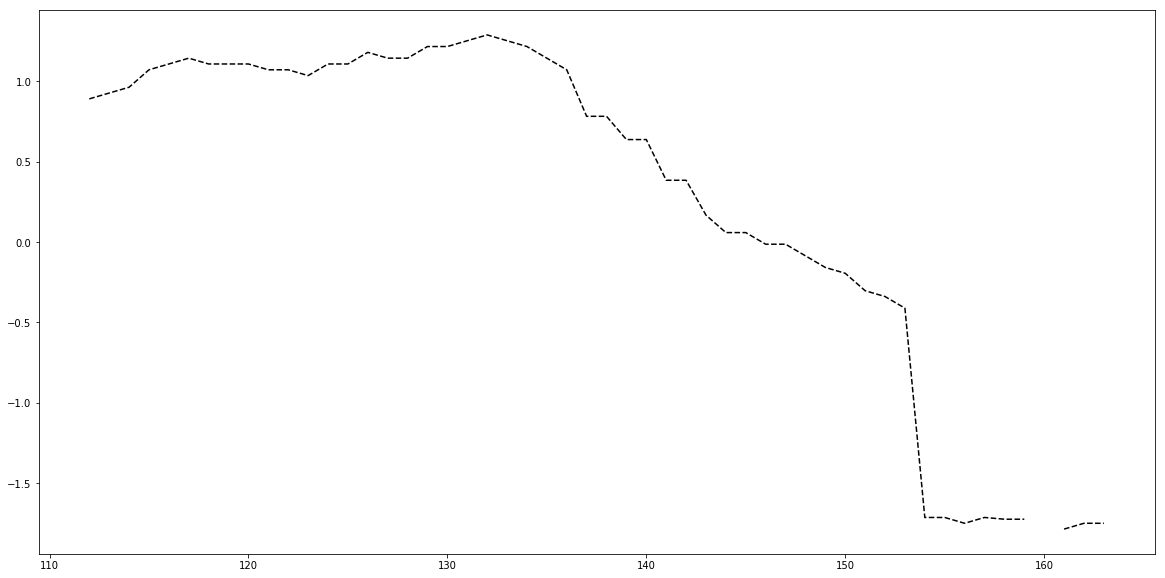

In [34]:
### Health Workforce null value treatment

# Graph
data[data['Country Name']=='Australia']['Healthcare Activities'].plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10))



C:\Users\HII\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Year                                                             0
Country Name                                                     0
Health Workforce                                                56
Healthcare Activities                                            0
Adolescent Fertitlity rate(births per 1000 women ages 15-19)     0
Fertility rate, total (births per woman)                         0
Survival to age 65 Female                                        0
Survival to age 65 Male                                          0
Survival to age 65 (% of cohort)                                 0
Infant Mortality                                                 0
Avg Mortality Rate                                               0
Mortality rate, adult, female                                    0
Mortality rate, adult, male                                      0
Overall Population                                               0
Female Population                                             

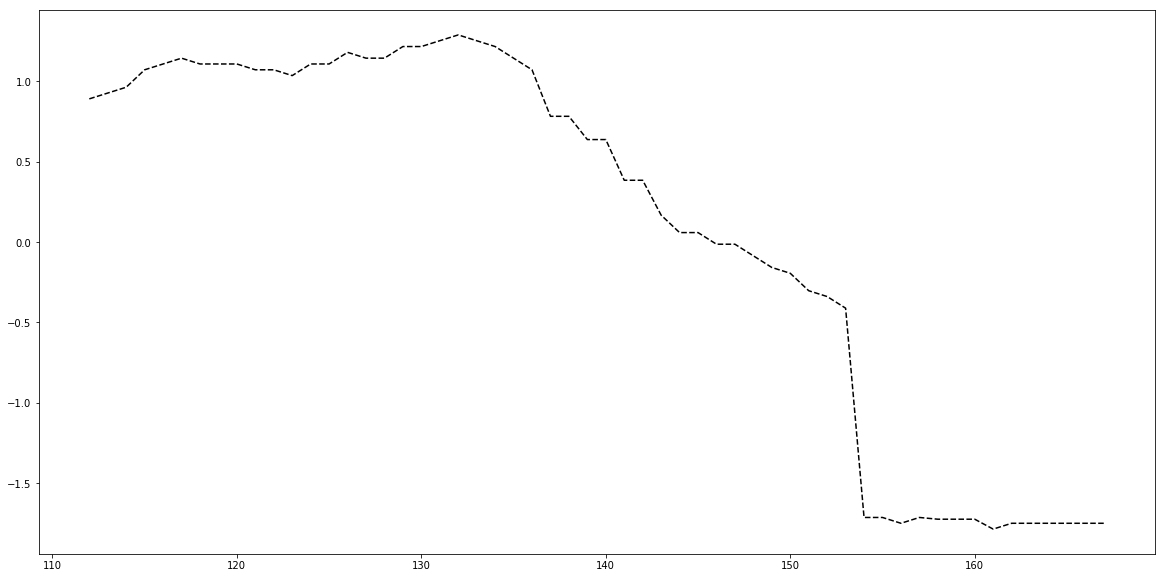

In [38]:
col=['Adolescent Fertitlity rate(births per 1000 women ages 15-19)','Fertility rate, total (births per woman)',
     'Avg Mortality Rate','Mortality rate, adult, female',
     'Mortality rate, adult, male',
     'Healthcare Activities',
     'Survival to age 65 (% of cohort)','Survival to age 65 Female','Survival to age 65 Male',
     'Population Growth Rate']
for i in col:
    df=data[data['Country Name']=='Australia']
    df_mean=df[i].rolling(2,min_periods=1,).mean()
    df[i].fillna(df_mean,inplace=True)

    data[data['Country Name']=='Australia']=df
    
print(data[data['Country Name']=='Australia'].isnull().sum())

# Graph
data[data['Country Name']=='Australia']['Healthcare Activities'].plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10))


# Italy

In [39]:
data[data['Country Name']=='Italy'].isnull().sum()

Year                                                             0
Country Name                                                     0
Health Workforce                                                56
Healthcare Activities                                            6
Adolescent Fertitlity rate(births per 1000 women ages 15-19)     1
Fertility rate, total (births per woman)                         1
Survival to age 65 Female                                        1
Survival to age 65 Male                                          1
Survival to age 65 (% of cohort)                                 1
Infant Mortality                                                 0
Avg Mortality Rate                                               6
Mortality rate, adult, female                                    6
Mortality rate, adult, male                                      6
Overall Population                                               0
Female Population                                             

C:\Users\HII\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Year                                                             0
Country Name                                                     0
Health Workforce                                                56
Healthcare Activities                                            0
Adolescent Fertitlity rate(births per 1000 women ages 15-19)     0
Fertility rate, total (births per woman)                         0
Survival to age 65 Female                                        0
Survival to age 65 Male                                          0
Survival to age 65 (% of cohort)                                 0
Infant Mortality                                                 0
Avg Mortality Rate                                               0
Mortality rate, adult, female                                    0
Mortality rate, adult, male                                      0
Overall Population                                               0
Female Population                                             

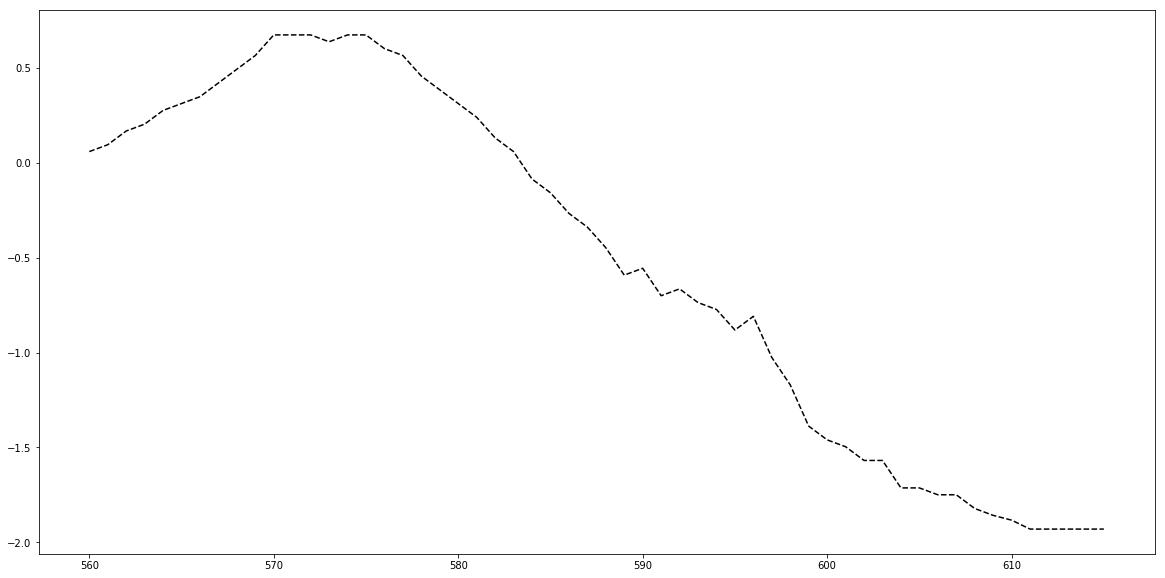

In [45]:
col=['Adolescent Fertitlity rate(births per 1000 women ages 15-19)','Fertility rate, total (births per woman)',
     'Avg Mortality Rate','Mortality rate, adult, female',
     'Mortality rate, adult, male',
     'Healthcare Activities',
     'Survival to age 65 (% of cohort)','Survival to age 65 Female','Survival to age 65 Male',
     'Population Growth Rate']
for i in col:
    df=data[data['Country Name']=='Italy']
    df_mean=df[i].rolling(2,min_periods=1,).mean()
    df[i].fillna(df_mean,inplace=True)

    data[data['Country Name']=='Italy']=df
    
print(data[data['Country Name']=='Italy'].isnull().sum())

# Graph
data[data['Country Name']=='Italy']['Healthcare Activities'].plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10))


In [46]:
data.to_csv('24-03-2019.csv',index=False)

## Time Series imputation for other countries

In [47]:
data_1=pd.read_csv('23-03-2019.csv')
data_1.head()

,Year,Country Name,Health Workforce,Healthcare Activities,Adolescent Fertitlity rate(births per 1000 women ages 15-19),"Fertility rate, total (births per woman)",Survival to age 65 Female,Survival to age 65 Male,Survival to age 65 (% of cohort),Infant Mortality,Avg Mortality Rate,"Mortality rate, adult, female","Mortality rate, adult, male",Overall Population,Female Population,Male Population,Population Growth Rate,Age dependency Ratio,Sex Ratio(Male to Female)
0,1960,European Union,NaN,NaN,-0.240377,-0.175933,0.118371,0.040324,0.079347,NaN,-0.275233,-0.285502,-0.264963,0.040191,0.839253,0.622655,-0.542898,-0.162078,0.821584
1,1961,European Union,NaN,NaN,-0.213048,-0.168673,0.156453,0.065586,0.111020,NaN,-0.303875,-0.321378,-0.286372,0.039921,0.854174,0.639082,-0.508897,-0.137044,0.824330
2,1962,European Union,NaN,NaN,-0.187328,-0.171574,0.194690,0.090843,0.142766,NaN,-0.286403,-0.314099,-0.258707,0.041219,0.869780,0.655826,-0.634063,-0.121763,0.826359
3,1963,European Union,NaN,NaN,-0.188559,-0.150098,0.214221,0.102519,0.158370,NaN,-0.290609,-0.324141,-0.257077,0.043544,0.885752,0.672347,-0.607015,-0.112616,0.827480
4,1964,European Union,NaN,NaN,-0.191342,-0.130377,0.233770,0.114194,0.173982,NaN,-0.338486,-0.366055,-0.310918,0.045938,0.901654,0.687978,-0.490586,-0.103209,0.827501


In [48]:
data_1.isnull().sum()

Year                                                               0
Country Name                                                       0
Health Workforce                                                 952
Healthcare Activities                                           1008
Adolescent Fertitlity rate(births per 1000 women ages 15-19)       0
Fertility rate, total (births per woman)                           0
Survival to age 65 Female                                          0
Survival to age 65 Male                                            0
Survival to age 65 (% of cohort)                                   0
Infant Mortality                                                 448
Avg Mortality Rate                                                56
Mortality rate, adult, female                                     56
Mortality rate, adult, male                                       56
Overall Population                                                 0
Female Population                 

In [51]:
# Null value imputation using rolling means of window size 2
col=['Adolescent Fertitlity rate(births per 1000 women ages 15-19)','Fertility rate, total (births per woman)',
     'Avg Mortality Rate','Mortality rate, adult, female','Infant Mortality',
     'Mortality rate, adult, male',
     'Survival to age 65 (% of cohort)','Survival to age 65 Female','Survival to age 65 Male',
     'Population Growth Rate']
coun=data['Country Name'].unique()
for i in coun:
    for j in col:
        df=data_1[data_1['Country Name']==i]
        df_mean=df[j].rolling(2,min_periods=1,).mean()
        df[j].fillna(df_mean,inplace=True)

        data_1[data_1['Country Name']==i]=df
    
data_1.isnull().sum()

C:\Users\HII\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Year                                                               0
Country Name                                                       0
Health Workforce                                                 952
Healthcare Activities                                           1008
Adolescent Fertitlity rate(births per 1000 women ages 15-19)       0
Fertility rate, total (births per woman)                           0
Survival to age 65 Female                                          0
Survival to age 65 Male                                            0
Survival to age 65 (% of cohort)                                   0
Infant Mortality                                                 448
Avg Mortality Rate                                                56
Mortality rate, adult, female                                     56
Mortality rate, adult, male                                       56
Overall Population                                                 0
Female Population                 

In [52]:
data_1.to_csv('24-03-2019.csv',index=False)